# ngEHT conversion guide

In [14]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 0.0.41 already installed.


## Download dataset

fitsidi from https://almascience.eso.org/almadata/ec/eht/2016.1.01114.V/group.uid___A001_X87c_X245.ec_jlgomez.e17a10-7-hi-oj287-3C279-fits.tgz

```python
importfitsidi('E17A10.0.bin0000.source0000.FITS',vis='E17A10.0.bin0000.source0000.ms')
mstransform(vis='E17A10.0.bin0000.source0000.ms',outputvis='ngEHT_E17A10.0.bin0000.source0000_split_lsrk.ms',spw='8:55~61,29:20~27', regridms=True,outframe='lsrk',datacolumn='all')
```

In [15]:
import toolviper

toolviper.utils.data.download(file="ngEHT_E17A10.0.bin0000.source0000_split.ms")

[2024-10-14 15:59:17,075]  WARNING   toolviper:  File exists: /home/fedemp/ws_xradio_dev/venv_xradio_python312/lib/python3.12/site-packages/toolviper/utils/data/.dropbox 
[2024-10-14 15:59:17,076]     INFO   toolviper:  Updating file metadata information ...  
 

 Download List                               
 ──────────────────────────────────────────── 
  ngEHT_E17A10.0.bin0000.source0000_split.ms

ngEHT_E17A10.0.bin0000.source0000_split.ms.zip:   0%|          | 0.00/10.6M [00:00<?, ?iB/s]

## Convert to Processing Set

In [16]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "ngEHT_E17A10.0.bin0000.source0000_split.ms"

main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "ngEHT_E17A10.0.bin0000.source0000_split_lsrk.vis.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel=False,
    overwrite=True,
    main_chunksize=main_chunksize,
)

[2024-10-14 15:59:22,897]     INFO   toolviper:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBSERVATION_ID', 'FIELD_ID'] 
[2024-10-14 15:59:23,030]     INFO   toolviper:  Number of partitions: 2 
[2024-10-14 15:59:23,032]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [-1], FIELD [0], SCAN [0] 
with_pointing True
[2024-10-14 15:59:23,246]  WARNING   toolviper:  Source_id is -1. No source information will be included in the field_and_source_xds. 
[2024-10-14 15:59:23,691]     INFO   toolviper:  OBSERVATION_ID [0], DDI [1], STATE [-1], FIELD [0], SCAN [0] 
with_pointing True
[2024-10-14 15:59:23,841]  WARNING   toolviper:  Source_id is -1. No source information will be included in the field_and_source_xds. 


## Processing Set

In [17]:
from xradio.measurement_set import open_processing_set

ps = open_processing_set(ps_store=outfile)
ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
1,ngEHT_E17A10.0.bin0000.source0000_split_0,[obs_0],"(2250, 20, 7, 4)","[RR, RL, LR, LL]",[0],spw_0,[3C279_0],[Unknown],[],"[fk5, 12h56m11.17s, -5d47m21.52s]",2.286593e+11,2.286623e+11
0,ngEHT_E17A10.0.bin0000.source0000_split_1,[obs_0],"(2250, 20, 8, 4)","[RR, RL, LR, LL]",[0],spw_1,[3C279_0],[Unknown],[],"[fk5, 12h56m11.17s, -5d47m21.52s]",2.298723e+11,2.298758e+11


In [18]:
ps.keys()

dict_keys(['ngEHT_E17A10.0.bin0000.source0000_split_1', 'ngEHT_E17A10.0.bin0000.source0000_split_0'])

In [19]:
ps["ngEHT_E17A10.0.bin0000.source0000_split_0"]

<xarray.MeasurementSetXds> Size: 18MB
Dimensions:                     (baseline_id: 20, time: 2250, frequency: 7,
                                 polarization: 4, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U2 160B dask.array<chunksize=(20,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U2 160B dask.array<chunksize=(20,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 160B 0 1 2 3 ... 16 17 18 19
    scan_number                 (time) int64 18kB dask.array<chunksize=(2250,), meta=np.ndarray>
  * time                        (time) float64 18kB 1.492e+09 ... 1.492e+09
  * frequency                   (frequency) float64 56B 2.287e+11 ... 2.287e+11
  * polarization                (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 360kB dask.array<chunksize=(20, 20), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 1MB dask.array<chunksize=(20, 20, 1, 4), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 360kB dask.array<chunksize=(20, 20), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 1MB dask.array<chunksize=(20, 20, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 10MB dask.array<chunksize=(20, 20, 1, 4), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 5MB dask.array<chunksize=(20, 20, 1, 4), meta=np.ndarray>
Attributes:
    creation_date:     2024-10-14T13:59:23.093924
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
    observation_info:  {'observer': ['PLUTO'], 'project': 'E17A10', 'release_...
    partition_info:    {'field_name': ['3C279_0'], 'intents': ['obs_0'], 'lin...
    processor_info:    {'sub_type': '', 'type': ''}
    schema_version:    4.0.-9994
    type:              visibility
    xradio_version:    0.0.41
    antenna_xds:       <xarray.Dataset> Size: 964B\nDimensions:              ...

In [20]:
ps["ngEHT_E17A10.0.bin0000.source0000_split_0"].attrs[
    "antenna_xds"
]

<xarray.Dataset> Size: 964B
Dimensions:                 (antenna_name: 6, cartesian_pos_label: 3,
                             receptor_label: 2)
Coordinates:
  * antenna_name            (antenna_name) <U2 48B 'AA' 'AP' 'AZ' 'LM' 'PV' 'SP'
  * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                   (antenna_name) <U16 384B dask.array<chunksize=(6,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 48B dask.array<chunksize=(6, 2), meta=np.ndarray>
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station                 (antenna_name) <U2 48B dask.array<chunksize=(6,), meta=np.ndarray>
    telescope_name          (antenna_name) <U4 96B dask.array<chunksize=(6,), meta=np.ndarray>
Data variables:
    ANTENNA_DISH_DIAMETER   (antenna_name) float64 48B dask.array<chunksize=(6,), meta=np.ndarray>
    ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 144B dask.array<chunksize=(6, 3), meta=np.ndarray>
    ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 96B dask.array<chunksize=(6, 2), meta=np.ndarray>
Attributes:
    overall_telescope_name:  VLBA
    relocatable_antennas:    False
    type:                    antenna

In [21]:
ps["ngEHT_E17A10.0.bin0000.source0000_split_0"].VISIBILITY.attrs["field_and_source_xds"]

<xarray.Dataset> Size: 96B
Dimensions:             (sky_dir_label: 2)
Coordinates:
    field_name          <U7 28B ...
  * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
    source_name         <U7 28B ...
Data variables:
    FIELD_PHASE_CENTER  (sky_dir_label) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    is_ephemeris:  False
    type:          field_and_source

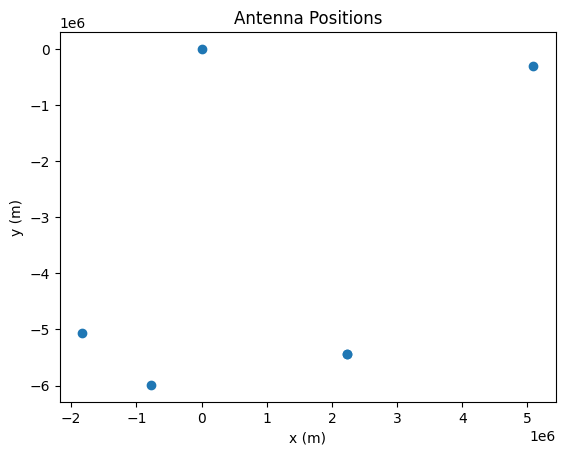

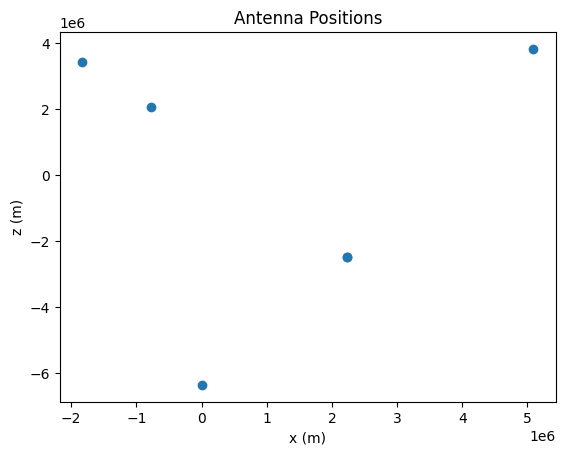

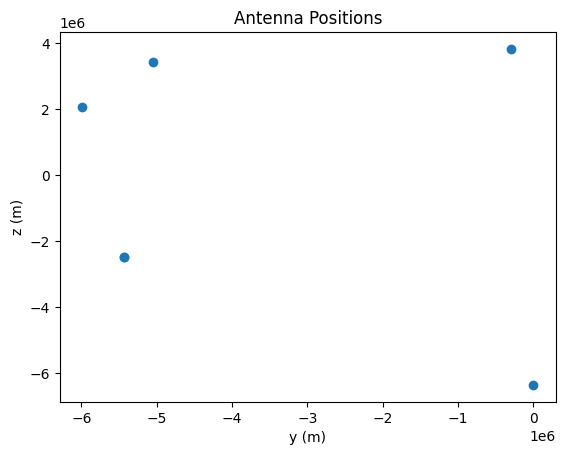

In [22]:
ps.plot_antenna_positions()

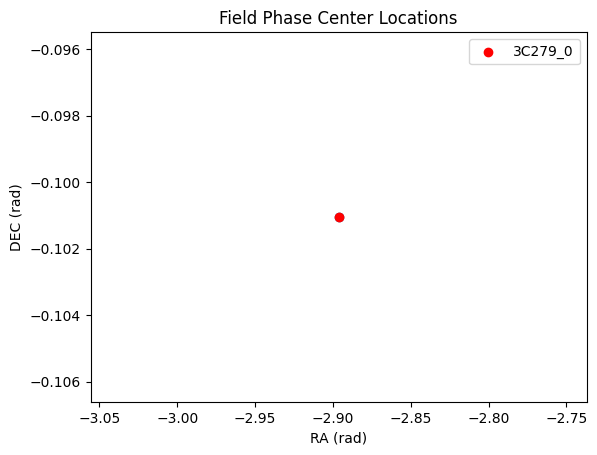

In [23]:
ps.plot_phase_centers()